In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

### Open dataset

In [20]:
file = "haberman.csv"
columns = ['age', 'year', 'nodes', 'class']
hab_df = pd.read_csv(file, header=None, names=columns)

#### Dataset summary

In [21]:
hab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   class   306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


#### Nan value

In [22]:
print(hab_df.isnull().values.any())

False


#### Dataset description

In [23]:
print(hab_df.describe())

              age        year       nodes       class
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


#### Distribution of output variable

In [24]:
from collections import Counter

target = hab_df['class'].values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=1, Count=225, Percentage=73.529%
Class=2, Count=81, Percentage=26.471%


### Graphical analysis

#### Calculate skewness

In [25]:
hab_df.agg(['skew']).transpose()

,skew
age,0.146505
year,0.078755
nodes,2.983823
class,1.071928


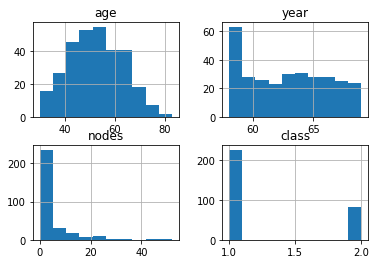

In [26]:
hab_df.hist()
plt.show()

/home/suelo/Desktop/env/lib/python3.6/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/suelo/Desktop/env/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/suelo/Desktop/env/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


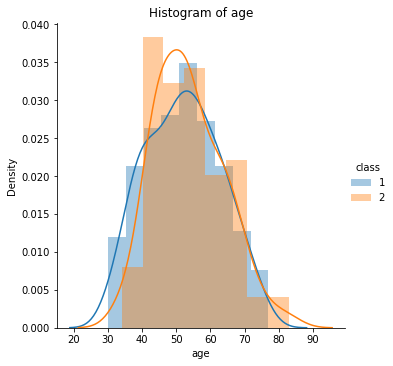

In [27]:
sns.FacetGrid(hab_df, hue = "class", size = 5).map(sns.distplot, "age").add_legend()
plt.title("Histogram of age")
plt.ylabel("Density")
plt.show()

In [ ]:
sns.boxplot(x='class',y='age', data=hab_df)
plt.show()

In [ ]:
sns.FacetGrid(hab_df, hue = "class", size = 5). map(sns.distplot, "year").add_legend()
plt.title("Histogram of operation_year")
plt.ylabel("Density")
plt.show()

In [ ]:
sns.boxplot(x='class',y='year', data=hab_df)
plt.show()

In [ ]:
sns.FacetGrid(hab_df, hue = "class", size = 5).map(sns.distplot, "nodes").add_legend()
plt.title("Histogram of axillary_lymph_node")
plt.ylabel("Density")
plt.show()

In [ ]:
sns.boxplot(x='class',y='nodes', data=hab_df)
plt.show()

In [ ]:
sns.color_palette("viridis", as_cmap=True)
sns.pairplot(hab_df, hue='class', height=4,vars=['age', 'nodes','year'])
plt.show()

In [ ]:
corr_mat = hab_df.corr()
plt.figure(figsize = [20,12])
sns.heatmap(corr_mat, annot = True, cmap = 'RdYlBu_r')
plt.title('Correlation Matrix')
plt.show()

### Data preprocessing

#### split into input and output elements

In [28]:
X = hab_df.drop('class',axis=1)
y = hab_df['class']

#### Encode output variable

In [29]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

In [30]:
hab_df.head()

,age,year,nodes,class
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


#### Split data in train and test

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=11)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(244, 3)
(244,)
(62, 3)
(62,)


### Evaluate models

In [32]:
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [33]:
models = [LogisticRegression(solver='lbfgs', class_weight='balanced'), 
        SVC(class_weight='balanced'), 
        MLPClassifier(hidden_layer_sizes=(4,),activation="relu",random_state=1, solver='adam'), 
        KNeighborsClassifier(n_neighbors=3, weights='distance')]

>Logisti 0.726 (0.048)
>SVC 0.723 (0.051)
>MLPClas 0.574 (0.077)
>KNeighb 0.664 (0.066)


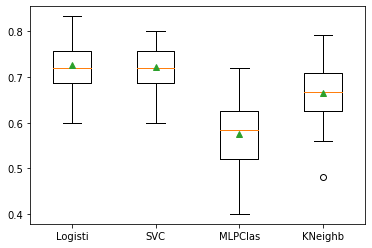

In [69]:
names, values = list(), list()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

for model in models:
	# get a name for the model
	name = type(model).__name__[:7]
	# create a pipeline
	pip = Pipeline(steps=[('t', StandardScaler()),('m',model)])
	# evaluate the model and store results
    
	scores = cross_val_score(pip, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
	# summarize and store
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
	names.append(name)
	values.append(scores)

plt.boxplot(values, labels=names, showmeans=True)
plt.show()

>Logisti 0.510 (0.137)
>SVC 0.491 (0.145)
>MLPClas 0.249 (0.111)
>KNeighb 0.365 (0.146)


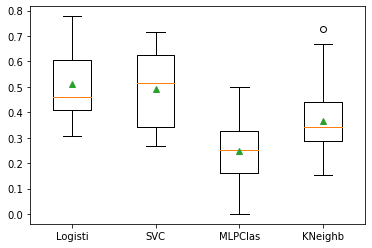

In [37]:
names, values = list(), list()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

for model in models:
	# get a name for the model
	name = type(model).__name__[:7]
	# create a pipeline
	pip = Pipeline(steps=[('t', StandardScaler()),('m',model)])
	# evaluate the model and store results
    
	scores = cross_val_score(pip, x_train, y_train, scoring='f1', cv=cv, n_jobs=-1)
	# summarize and store
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
	names.append(name)
	values.append(scores)

plt.boxplot(values, labels=names, showmeans=True)
plt.show()

In [65]:
models = [LogisticRegression(solver='lbfgs'), 
        SVC(), 
        MLPClassifier(hidden_layer_sizes=(4,),activation="relu",random_state=1, solver='adam'), 
        KNeighborsClassifier()]

>Logisti 0.725 (0.040)
>SVC 0.724 (0.056)
>MLPClas 0.569 (0.086)
>KNeighb 0.660 (0.066)


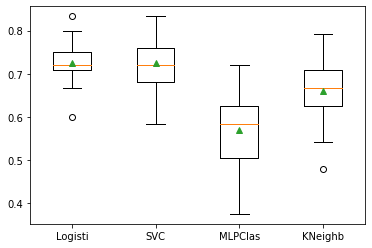

In [66]:
names, values = list(), list()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)

for model in models:
	# get a name for the model
	name = type(model).__name__[:7]
	# create a pipeline
	pip = Pipeline(steps=[('t', StandardScaler()),('m',model)])
	# evaluate the model and store results
    
	scores = cross_val_score(pip, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
	# summarize and store
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
	names.append(name)
	values.append(scores)

plt.boxplot(values, labels=names, showmeans=True)
plt.show()

#### Logistic regression

In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import confusion_matrix

In [72]:
model = LogisticRegression(solver='lbfgs')
#pip = Pipeline(steps=[('t', StandardScaler()),('m',model)])
cv = KFold(n_splits=20, random_state=1, shuffle=True)

#scores = cross_val_score(pip, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)   
scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)   
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.729 (0.125)


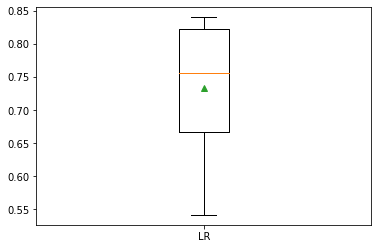

In [83]:
plt.boxplot(scores, labels=['LR'], showmeans=True)
plt.show()

In [40]:
model.fit(x_train, y_train)
prediction = model.predict(x_test)
conf_mtx = confusion_matrix(y_test, prediction)
print(conf_mtx)


[[42  9]
 [ 6  5]]


In [41]:
t = conf_mtx.sum()
print(conf_mtx[0,0]/t, conf_mtx[0,1]/t)
print(conf_mtx[1,0]/t, conf_mtx[1,1]/t)

0.6774193548387096 0.14516129032258066
0.0967741935483871 0.08064516129032258


In [42]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [43]:
print(recall_score(y_test, prediction))
print(precision_score(y_test,prediction))
print(f1_score(y_test, prediction))

0.45454545454545453
0.35714285714285715
0.4


#### Support vector Machine (SVM)

In [44]:
from sklearn import svm

In [45]:
model_SVM = svm.SVC(class_weight='balanced')   # inicializando el mode
pip = Pipeline(steps=[('t', StandardScaler()),('m',model)])
cv = KFold(n_splits=10, random_state=1, shuffle=True)

scores = cross_val_score(pip, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.733 (0.097)


In [ ]:
plt.boxplot(scores, labels=['LR'], showmeans=True)
plt.show()

In [47]:
model.fit(x_train, y_train)
prediction = model.predict(x_test)
conf_mtx = confusion_matrix(y_test, prediction)
print(conf_mtx)

[[42  9]
 [ 6  5]]


In [48]:
t = conf_mtx.sum()
print(conf_mtx[0,0]/t, conf_mtx[0,1]/t)
print(conf_mtx[1,0]/t, conf_mtx[1,1]/t)

0.6774193548387096 0.14516129032258066
0.0967741935483871 0.08064516129032258


In [54]:
print(recall_score(y_test, prediction))
print(precision_score(y_test,prediction))
print(f1_score(y_test, prediction))

0.36363636363636365
0.5
0.4210526315789474


#### Multi Layer Perceptron

In [55]:
model = MLPClassifier(max_iter=100)
pip = Pipeline(steps=[('t', StandardScaler()),('m',model)])
cv = KFold(n_splits=10, random_state=1, shuffle=True)

scores = cross_val_score(pip, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.729 (0.092)


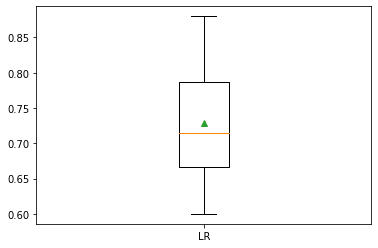

In [56]:
plt.boxplot(scores, labels=['LR'], showmeans=True)
plt.show()

In [57]:
model.fit(x_train, y_train)
prediction = model.predict(x_test)
conf_mtx = confusion_matrix(y_test, prediction)
print(conf_mtx)

[[49  2]
 [ 7  4]]


/home/suelo/Desktop/env/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [58]:
t = conf_mtx.sum()
print(conf_mtx[0,0]/t, conf_mtx[0,1]/t)
print(conf_mtx[1,0]/t, conf_mtx[1,1]/t)

0.7903225806451613 0.03225806451612903
0.11290322580645161 0.06451612903225806


In [59]:
print(recall_score(y_test, prediction))
print(precision_score(y_test,prediction))
print(f1_score(y_test, prediction))

0.36363636363636365
0.6666666666666666
0.4705882352941177


#### KNN

In [60]:
model = KNeighborsClassifier(n_neighbors=3, weights='distance')
pip = Pipeline(steps=[('t', PowerTransformer()),('m',model)])
cv = KFold(n_splits=10, random_state=1, shuffle=True)

scores = cross_val_score(pip, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.620 (0.118)


In [ ]:
plt.boxplot(scores, labels=['LR'], showmeans=True)
plt.show()

In [62]:
model.fit(x_train, y_train)
prediction = model.predict(x_test)
conf_mtx = confusion_matrix(y_test, prediction)
print(conf_mtx)

[[42  9]
 [ 8  3]]


In [63]:
t = conf_mtx.sum()
print(conf_mtx[0,0]/t, conf_mtx[0,1]/t)
print(conf_mtx[1,0]/t, conf_mtx[1,1]/t)

0.6774193548387096 0.14516129032258066
0.12903225806451613 0.04838709677419355


In [64]:
print(recall_score(y_test, prediction))
print(precision_score(y_test,prediction))
print(f1_score(y_test, prediction))

0.2727272727272727
0.25
0.2608695652173913
